In [1]:
import os
import sys
import pandas as pd
import numpy as np

sys.path.append('..')
import linear_regression

In [2]:
from linear_regression.data_preprocess import DataPreprocess
from linear_regression.result_analysis import *

In [3]:
def get_all_indicators(data_path, train_dates):
    indicators = set()
    for date in train_dates:
        pickle_name = os.path.join(data_path, f'indicators.{date}.pickle')
        df_indicator = pd.read_pickle(pickle_name)
        indicators |= set(df_indicator.columns.tolist())
    indicators.remove('id')
    return list(sorted(indicators))

In [4]:
k_data_path = '../generate_data/regress_data/past_4_quarters/'
k_train_dates = [
    '2020-09-30',
    '2020-12-31',
    '2021-03-31',
    '2021-06-30',
]
k_test_dates = ['2021-09-30']

k_predict_month = 1
k_predict_mode  = 'predict_changerate_price'

k_change_threshold_train = -1e-9
k_change_threshold_test  = -1e-9

In [5]:
month_label = f'{k_predict_month}_{k_predict_mode}'
x_train_, x_test_, y_train_, y_test_, train_id_, test_id_ = DataPreprocess(
    data_path       = k_data_path,
    train_date_list = k_train_dates,
    test_date_list  = k_test_dates,
    n_month_predict = 3,
    i_month_label   = month_label,
    indicator_list  = get_all_indicators(k_data_path, k_train_dates)).run()

stocks_train, y_train, x_train, stocks_id_train = drop_small_change_stock_fntrain(
    y_train_[month_label], x_train_, k_change_threshold_train, train_id_['id'])

y_test  = y_test_[month_label]
x_test  = x_test_

train date: 2020-09-30
train date: 2020-12-31
train date: 2021-03-31
train date: 2021-06-30
test date: 2021-09-30


In [6]:
print('train pre-drop:  ', x_train_.shape, y_train_.shape)
print('train post-drop: ', x_train.shape,  y_train.shape)
print('test:            ', x_test.shape,   y_test.shape)

train pre-drop:   (1828, 30) (1828, 2)
train post-drop:  (1828, 30) (1828,)
test:             (853, 30) (853,)


In [7]:
import sklearn
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=None, random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)


-0.45060261704005833

In [8]:
importance = pd.DataFrame(zip(get_all_indicators(k_data_path, k_train_dates),
                              model.feature_importances_))
importance.columns = ['indicator', 'importance']

<AxesSubplot:xlabel='importance', ylabel='indicator'>

/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIF

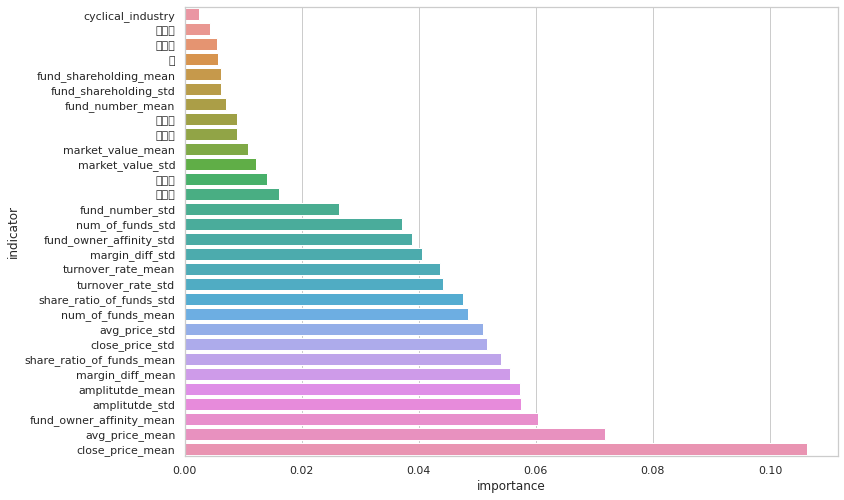

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
sns.barplot(x='importance', y='indicator', data=importance.sort_values('importance'))

<AxesSubplot:xlabel='importance', ylabel='indicator'>

/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIF

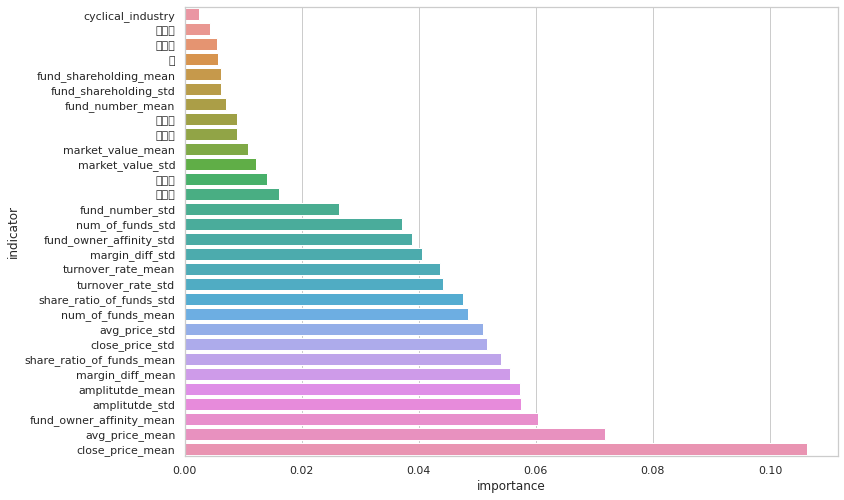

In [10]:

sns.barplot(x='importance', y='indicator', data=importance.sort_values('importance'))

<AxesSubplot:xlabel='value', ylabel='variable'>

/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIF

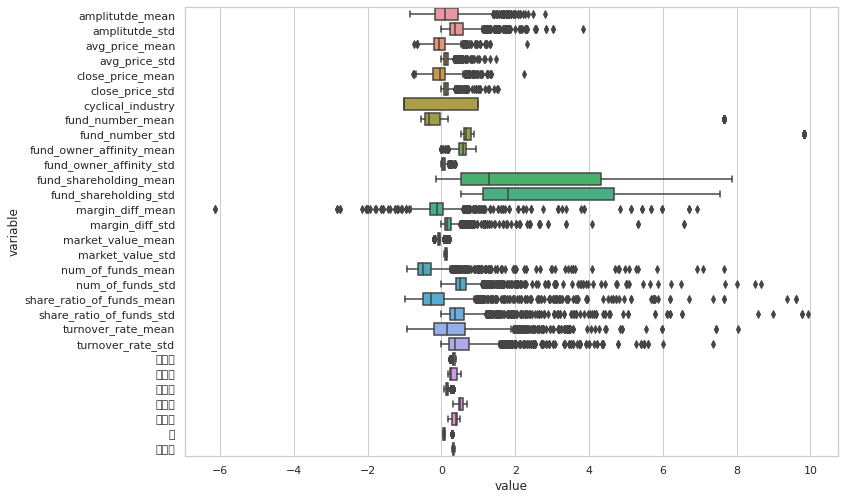

In [11]:
x_train_with_id = pd.merge(train_id_, x_train, left_index=True, right_index=True)
x_train_melted  = pd.melt(x_train_with_id, id_vars=['id'])
sns.boxplot(x='value', y='variable', data=x_train_melted)

<AxesSubplot:xlabel='value', ylabel='variable'>

/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jiacheng.pan/env_jupyter/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIF

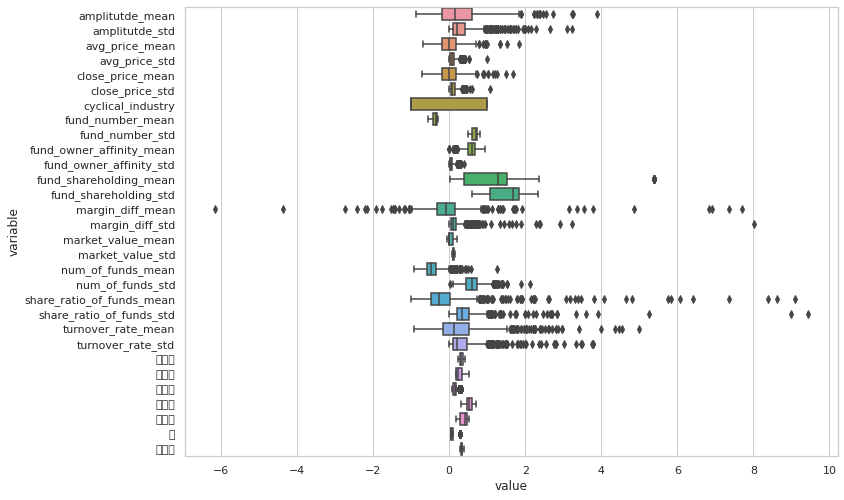

In [12]:
x_test_with_id = pd.merge(test_id_, x_test, left_index=True, right_index=True)
x_test_melted  = pd.melt(x_test_with_id, id_vars=['id'])
sns.boxplot(x='value', y='variable', data=x_test_melted)